In [1]:
import os
import cv2
import random
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
train_data = "train"
test_data = "test"
val_data = "validation"

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_data, target_size=(224,224), classes=['Covid','Normal','Viral Pneumonia'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_data, target_size=(224,224), classes=['Covid','Normal','Viral Pneumonia'], batch_size=10, shuffle=False)

Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

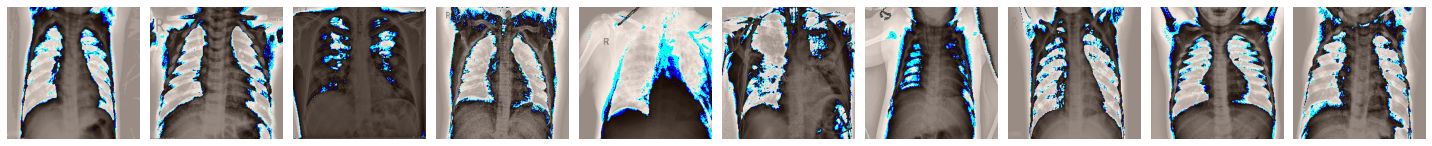

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
batch_size = 15

model.fit(
    x = train_batches, 
    steps_per_epoch = train_batches.samples // batch_size, 
    epochs = 15, 
    validation_data = test_batches, 
    validation_steps = test_batches.samples // batch_size,
    verbose=2)

Epoch 1/15
16/16 - 12s - loss: 309.0681 - accuracy: 0.5312 - val_loss: 9.9057 - val_accuracy: 0.4000 - 12s/epoch - 774ms/step
Epoch 2/15
16/16 - 11s - loss: 1.9998 - accuracy: 0.7688 - val_loss: 1.2204 - val_accuracy: 0.7000 - 11s/epoch - 700ms/step
Epoch 3/15
16/16 - 11s - loss: 0.2098 - accuracy: 0.9371 - val_loss: 0.3434 - val_accuracy: 0.8750 - 11s/epoch - 686ms/step
Epoch 4/15
16/16 - 11s - loss: 0.0311 - accuracy: 0.9874 - val_loss: 0.3208 - val_accuracy: 0.8750 - 11s/epoch - 671ms/step
Epoch 5/15
16/16 - 10s - loss: 0.1114 - accuracy: 0.9811 - val_loss: 1.7488 - val_accuracy: 0.6500 - 10s/epoch - 636ms/step
Epoch 6/15
16/16 - 10s - loss: 0.0311 - accuracy: 0.9937 - val_loss: 0.6151 - val_accuracy: 0.7750 - 10s/epoch - 641ms/step
Epoch 7/15
16/16 - 10s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.7528 - val_accuracy: 0.7500 - 10s/epoch - 638ms/step
Epoch 8/15
16/16 - 10s - loss: 7.7705e-04 - accuracy: 1.0000 - val_loss: 0.8723 - val_accuracy: 0.8000 - 10s/epoch - 628ms/step
Ep

In [10]:
predictions = model.predict(x = test_batches, verbose=0)
print(predictions)

[[1.00000000e+00 3.76449288e-11 2.39173210e-13]
 [1.00000000e+00 5.42697123e-08 1.75517147e-08]
 [7.95587063e-01 5.88808861e-03 1.98524788e-01]
 [1.00000000e+00 3.30193517e-09 4.20252548e-12]
 [9.99922752e-01 7.38376111e-05 3.42346630e-06]
 [9.99072194e-01 2.73915648e-04 6.53873838e-04]
 [9.99847770e-01 1.38982534e-04 1.32085352e-05]
 [9.98284638e-01 1.59212248e-03 1.23136095e-04]
 [9.98718381e-01 1.28168589e-03 7.89799059e-10]
 [8.73610973e-01 1.26388669e-01 3.78403939e-07]
 [9.99384284e-01 6.02905289e-04 1.27063258e-05]
 [9.99933481e-01 6.55621043e-05 9.29388136e-07]
 [9.98199284e-01 1.79838797e-03 2.36998244e-06]
 [4.39008147e-01 1.53749377e-01 4.07242477e-01]
 [9.97448444e-01 2.54422845e-03 7.35181538e-06]
 [1.00000000e+00 2.48678567e-09 2.57557725e-11]
 [1.00000000e+00 6.36394271e-09 3.73877951e-09]
 [1.00000000e+00 6.08957818e-09 2.74320868e-08]
 [9.99975562e-01 3.95693519e-07 2.40216450e-05]
 [9.99964476e-01 4.19887783e-07 3.49911497e-05]
 [9.99847770e-01 1.38982534e-04 1.320853

In [11]:
classes=['C','N','V']
label = []
out = []
for i in os.listdir(val_data):
    val_img = tf.keras.utils.load_img(val_data+"/"+i,target_size=(224,224))
    val_img = tf.keras.utils.img_to_array(val_img)
    val_img = np.expand_dims(val_img,axis=0)
    predict_x=model.predict(val_img)
    output = classes[np.argmax(predict_x)]
    label.append(i)
    out.append(output)
    print("X-Ray", i,"\n Diagnosis: ", output)

1/1 [==============================] - 0s 119ms/step
X-Ray pic1.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 33ms/step
X-Ray pic10.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 37ms/step
X-Ray pic2.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 52ms/step
X-Ray pic3.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 37ms/step
X-Ray pic4.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 41ms/step
X-Ray pic5.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 42ms/step
X-Ray pic6.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 46ms/step
X-Ray pic7.jpg 
 Diagnosis:  C
1/1 [==============================] - 0s 40ms/step
X-Ray pic8.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 33ms/step
X-Ray pic9.jpeg 
 Diagnosis:  C


In [12]:
lbl = pd.DataFrame(label, columns = ["X-Ray"])
out = pd.DataFrame(out, columns = ['Diagnosis'])

final_output = pd.concat([lbl, out], axis = 1)
final = final_output.set_index("X-Ray")
print(final)

           Diagnosis
X-Ray               
pic1.jpeg          C
pic10.jpeg         C
pic2.jpeg          C
pic3.jpeg          C
pic4.jpeg          N
pic5.jpeg          N
pic6.jpeg          C
pic7.jpg           C
pic8.jpeg          V
pic9.jpeg          C


In [13]:
final.to_csv('Cruz_cnn_output.csv')